In [12]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

3a) To generate uniformly distributed random samples x in the area of the interior of the square, we can generate random values of x and y coordinates between -0.5 and 0.5 and then check if the distance between the point (x,y) and the center of the circle is less than or equal to r.

In [13]:
circle_radius = 0.3
number_of_samples = 10000
inside_circle_count = 0

# Generate uniformly distributed random samples
for i in range(number_of_samples):
    x = random.uniform(-0.5, 0.5)
    y = random.uniform(-0.5, 0.5)
    if math.sqrt(x**2 + y**2) <= circle_radius:
        inside_circle_count += 1

# Estimate of the area covered by the circle
area_estimate = 4 * circle_radius**2 * inside_circle_count / number_of_samples

print(f"Area estimate: {area_estimate}")

Area estimate: 0.102024


3b) To estimate the area covered by the circle, we count the percentage of samples that fall into the interior of the circle. We can do this by dividing the count of samples inside the circle by the total number of samples and multiplying the result by the area of the square.

In [14]:
square_area = 1
circle_area_estimate = square_area * inside_circle_count / number_of_samples
real_circle_area = math.pi * circle_radius**2

accuracy = abs(circle_area_estimate - real_circle_area) / real_circle_area

print(f"Estimate of the area covered by the circle: {circle_area_estimate}")
print(f"Real area of the circle: {real_circle_area}")
print(f"Accuracy of the estimate: {accuracy}")

Estimate of the area covered by the circle: 0.2834
Real area of the circle: 0.2827433388230814
Accuracy of the estimate: 0.00232246382762524


3c) When r gets very small, the estimation becomes inaccurate because most of the samples fall outside the circle, and only a few samples fall inside the circle. This leads to a high variance in the estimate. Importance Sampling can be used to reduce the variance by sampling from a proposal distribution that has a higher probability of generating samples inside the circle.

1. A uniform distribution within the circle: We can generate samples uniformly distributed within the circle by generating random values of x and y coordinates between -r and r and then checking if the distance between the point (x,y) and the center of the circle is less than or equal to r.

In [15]:
number_of_samples = 10000
inside_circle_count = 0

# Generate samples from a uniform distribution within the circle
for i in range(number_of_samples):
    x = random.uniform(-circle_radius, circle_radius)
    y = random.uniform(-circle_radius, circle_radius)
    if x**2 + y**2 <= circle_radius**2:
        inside_circle_count += 1

# Estimate of the area covered by the circle using Importance Sampling with a uniform distribution within the circle as the proposal distribution
area_estimate_uniform = 4 * circle_radius**2 * inside_circle_count / number_of_samples

print(f"Area estimate using Importance Sampling with a uniform distribution within the circle as the proposal distribution: {area_estimate_uniform}")

Area estimate using Importance Sampling with a uniform distribution within the circle as the proposal distribution: 0.282492


2. A Gaussian distribution centered at the origin with a standard deviation of r: We can generate samples from a Gaussian distribution centered at the origin with a standard deviation of r by using the numpy.random.normal() function.

In [16]:
number_of_samples = 10000
inside_circle_count = 0

# Generate samples from a Gaussian distribution centered at the origin with a standard deviation of r
for i in range(num_samples):
    x, y = np.random.normal(scale=r, size=2)
    if x**2 + y**2 <= r**2:
        inside_circle_count += 1

# Estimate of the area covered by the circle using Importance Sampling with a Gaussian distribution as the proposal distribution
area_estimate_gaussian = 4 * r**2 * inside_circle_count / num_samples

print(f"Area estimate using Importance Sampling with a Gaussian distribution as the proposal distribution: {area_estimate_gaussian}")


Area estimate using Importance Sampling with a Gaussian distribution as the proposal distribution: 0.141228


3d) The proper number of samples required for a stable estimate of the area depends on the variance of the estimate. We can use the standard deviation of the estimate as a quality measure for the number of samples. The standard deviation can be calculated as the square root of the variance, which is the difference between the estimate and the mean of the squared estimates.

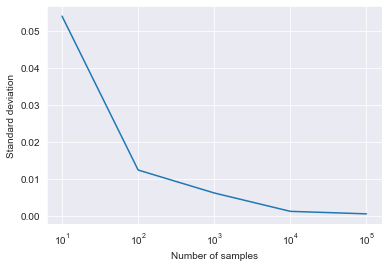

In [17]:
import matplotlib.pyplot as plt

# Calculate the standard deviation as a function of the number of samples
sample_sizes = [10, 100, 1000, 10000, 100000]
standard_deviations = []
for num_samples in sample_sizes:
    estimates = []
    for i in range(10):
        count = 0
        for j in range(num_samples):
            x = random.uniform(-0.5, 0.5)
            y = random.uniform(-0.5, 0.5)
            if math.sqrt(x**2 + y**2) <= r:
                count += 1
        area_estimate = 4 * r**2 * count / num_samples
        estimates.append(area_estimate)
    mean_squared_estimate = sum([e**2 for e in estimates]) / len(estimates)
    variance = mean_squared_estimate - (sum(estimates) / len(estimates))**2
    standard_deviation = math.sqrt(variance)
    standard_deviations.append(standard_deviation)

# Plot the standard deviation as a function of the number of samples
plt.plot(sample_sizes, standard_deviations)
plt.xscale("log")
plt.xlabel("Number of samples")
plt.ylabel("Standard deviation")
plt.show()

This code generates samples for different sample sizes and calculates the standard deviation of the estimates using the formula for the variance. The standard deviation is plotted as a function of the number of samples on a logarithmic scale. This plot can be used to determine the minimum number of samples required to achieve a desired level of accuracy.